In [1]:
!pip install scikeras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
# Import KerasRegressor from scikeras.wrappers
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# Install the necessary modules
!pip install ipywidgets

# Import the necessary modules
import io
import pandas as pd
from ipywidgets import FileUpload

# Create a file upload widget
uploader = FileUpload()
uploader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.3 MB/s eta 0:00:00


FileUpload(value={}, description='Upload')

In [3]:
# Load the dataset
data = pd.read_csv(io.BytesIO(uploader.data[0]))

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

,oz,exchange,oil
Date,,,
2010-01-04,3669,3.3990,80.12
2010-01-05,3711,3.3875,80.59
2010-01-07,3746,3.3710,81.51
2010-01-08,3717,3.3760,81.37
2010-01-11,3786,3.3365,80.97


In [4]:
data.shape

(3236, 3)

In [5]:
test_split=round(len(data)*0.25)
df_for_training=data[:-810]
df_for_testing=data[-810:]
print(df_for_training.shape)
print(df_for_testing.shape)

(2426, 3)
(810, 3)


In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)
df_for_testing_scaled=scaler.transform(df_for_testing)
df_for_training_scaled

array([[0.        , 0.29519231, 0.52890554],
       [0.01407035, 0.28782051, 0.53366407],
       [0.02579564, 0.27724359, 0.54297864],
       ...,
       [0.85963149, 0.77179487, 0.3773413 ],
       [0.85829146, 0.76923077, 0.37815126],
       [0.85695142, 0.77083333, 0.38179609]])

In [7]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)
trainX,trainY=createXY(df_for_training_scaled,30)
testX,testY=createXY(df_for_testing_scaled,30)

In [8]:
pip install scikeras

In [9]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

In [28]:
# Build LSTM model
model1 = Sequential()

# LSTM layers with dropout
# Changed input_shape to match the actual shape of trainX (timesteps, features)
model1.add(LSTM(units=100, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model1.add(Dropout(0.2))
model1.add(LSTM(units=100, return_sequences=False))
model1.add(Dropout(0.2))

# Dense layer for output
model1.add(Dense(units=1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(trainX, trainY, epochs=30, batch_size=16)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0310
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - loss: 0.0026
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0026
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0025
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0021
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0018
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 44ms/step - loss: 0.0021
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 0.0019
Epoch 9/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0016
Epoch 10/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0015
Epoch 11/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.0014
Epoch 12/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - loss: 0.0014
Epoch 13/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0012
Epoch 14/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0014
Epoch 15/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 34

In [29]:
# Now you can make predictions
prediction = model1.predict(testX)
print("prediction\n", prediction)
print("\nPrediction Shape-", prediction.shape)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
prediction
 [[0.98474896]
 [0.96391416]
 [0.9569807 ]
 [0.9657911 ]
 [0.9833846 ]
 [0.9901259 ]
 [0.9844692 ]
 [0.9850993 ]
 [0.9916278 ]
 [0.9997717 ]
 [1.004892  ]
 [1.0205048 ]
 [1.0387001 ]
 [1.0617192 ]
 [1.1145296 ]
 [1.1245891 ]
 [1.1262323 ]
 [1.1283319 ]
 [1.125014  ]
 [1.0792474 ]
 [1.0587577 ]
 [1.0919558 ]
 [1.1024369 ]
 [1.1307455 ]
 [1.1725999 ]
 [1.1735489 ]
 [1.1652732 ]
 [1.1534324 ]
 [1.1085244 ]
 [1.0719489 ]
 [1.0323491 ]
 [1.0475154 ]
 [1.0288566 ]
 [1.0141908 ]
 [1.020402  ]
 [1.088483  ]
 [1.1839501 ]
 [1.1904286 ]
 [1.1698785 ]
 [1.1639997 ]
 [1.1574862 ]
 [1.1172825 ]
 [1.1274958 ]
 [1.1491076 ]
 [1.1716049 ]
 [1.2058803 ]
 [1.2083504 ]
 [1.2037247 ]
 [1.2242771 ]
 [1.2374882 ]
 [1.270276  ]
 [1.2911062 ]
 [1.2965906 ]
 [1.2995698 ]
 [1.2727449 ]
 [1.2811735 ]
 [1.2884467 ]
 [1.3037264 ]
 [1.3204957 ]
 [1.3247238 ]
 [1.3116399 ]
 [1.3044493 ]
 [1.3007035 ]
 [1.2906339 ]
 [1.2765462 ]
 [1.2702798 ]
 [1.2752769 ]
 [1.382686

In [30]:
# Reshape your prediction to have 3 columns (assuming your original data had 3 features)
prediction_reshaped = prediction.reshape(-1, 1)

# Repeat the column 3 times to match the original data shape
prediction_reshaped = np.repeat(prediction_reshaped, 3, axis=1)

# Now apply inverse_transform
inversed_prediction = scaler.inverse_transform(prediction_reshaped)

# If you only need the first column (original prediction):
inversed_prediction = inversed_prediction[:, 0]

In [31]:
prediction_copies_array = np.repeat(prediction,3, axis=-1)

In [32]:
prediction_copies_array.shape

(780, 3)

In [33]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),3)))[:,0]

In [34]:
original_copies_array = np.repeat(testY,3, axis=-1)
original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),3)))[:,0]

In [35]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- " ,original)

Pred Values--  [6608.4756 6546.2837 6525.5874 6551.886  6604.4033 6624.526  6607.6406
 6609.5215 6629.009  6653.3184 6668.6025 6715.2065 6769.52   6838.232
 6995.871  7025.898  7030.803  7037.071  7027.1665 6890.553  6829.3916
 6928.488  6959.774  7044.2754 7169.2104 7172.0435 7147.341  7111.9956
 6977.9453 6868.767  6750.562  6795.8335 6740.1367 6696.3594 6714.9
 6918.1216 7203.091  7222.429  7161.0874 7143.5386 7124.096  7004.088
 7034.575  7099.086  7166.2407 7268.5522 7275.9263 7262.118  7323.467
 7362.902  7460.7734 7522.952  7539.3228 7548.2163 7468.1436 7493.3027
 7515.013  7560.6235 7610.6797 7623.3003 7584.2446 7562.7812 7551.6
 7521.5425 7479.4907 7460.7847 7475.7017 7796.319  7613.6074 7542.0215
 7545.755  7587.8394 7686.6953 7655.5146 7668.0225 7683.033  7639.215
 7581.786  7563.523  7584.087  7629.5356 7617.358  7522.831  7423.9766
 7423.6724 7374.2944 7425.2686 7477.456  7498.444  7505.484  7475.7812
 7479.9062 7486.1265 7483.8716 7543.368  7574.424  7629.8833 7631.1147
 

In [36]:
# prompt: data frame actual vs predicted

# Create a DataFrame for actual vs. predicted values
df_compare = pd.DataFrame({'Actual': original, 'Predicted': pred})
# Print the DataFrame
df_compare.head(10)

,Actual,Predicted
0,6506.0,6608.475586
1,6534.0,6546.283691
2,6592.0,6525.587402
3,6653.0,6551.886230
4,6640.0,6604.403320
5,6604.0,6624.525879
6,6632.0,6607.640625
7,6664.0,6609.521484
8,6689.0,6629.008789
9,6697.0,6653.318359


In [37]:
df_compare.tail(10)

,Actual,Predicted
770,9053.0,8723.272461
771,9134.0,8749.429688
772,9008.0,8802.416016
773,8992.0,8732.685547
774,9050.0,8710.837891
775,9017.0,8749.009766
776,8990.0,8741.691406
777,9093.0,8721.694336
778,9049.0,8784.506836
779,9024.0,8768.001953


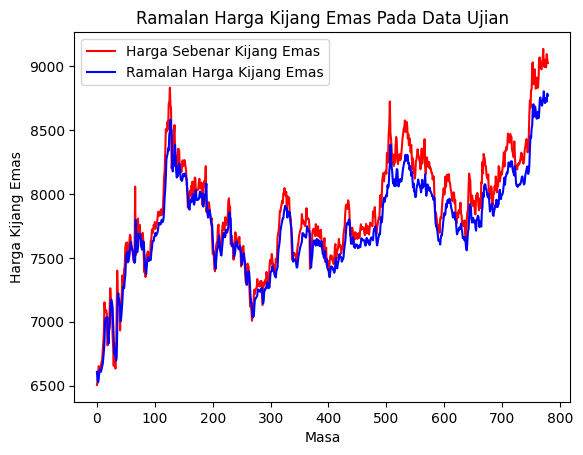

In [38]:
plt.plot(original, color = 'red', label = 'Harga Sebenar Kijang Emas')
plt.plot(pred, color = 'blue', label = 'Ramalan Harga Kijang Emas')
plt.title('Ramalan Harga Kijang Emas Pada Data Ujian')
plt.xlabel('Masa')
plt.ylabel('Harga Kijang Emas')
plt.legend()
plt.show()

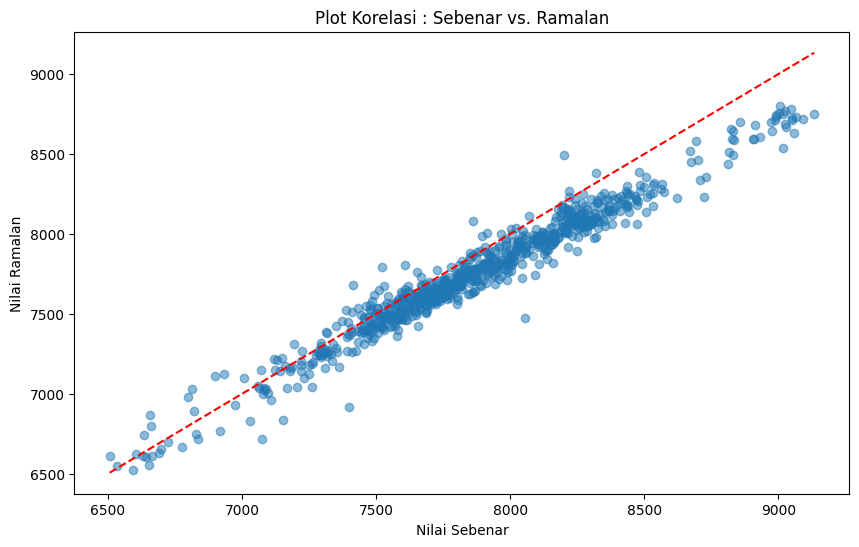

In [39]:
# prompt: cor plot actual vs predicted

plt.figure(figsize=(10, 6))
plt.scatter(original, pred, alpha=0.5)
plt.xlabel("Nilai Sebenar")
plt.ylabel("Nilai Ramalan")
plt.title("Plot Korelasi : Sebenar vs. Ramalan")
plt.plot([min(original), max(original)], [min(original), max(original)], color='red', linestyle='--') # Add a diagonal line
plt.show()

In [40]:
# prompt: correlation value and rsquared value

import numpy as np
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation_coefficient, p_value = pearsonr(original, pred)
print(f"Pekali korelasi: {correlation_coefficient}")

# Calculate R-squared
# R-squared is the square of the correlation coefficient
r_squared = correlation_coefficient**2
print(f"R-squared: {r_squared}")

Pekali korelasi: 0.9777394840334149
R-squared: 0.9559744986379285


In [43]:
df_30_days_past=data.iloc[-30:,:]
df_30_days_past.tail()

,oz,exchange,oil
Date,,,
2023-04-20,9017,4.4355,80.81
2023-04-25,8990,4.4495,80.60
2023-04-26,9093,4.4575,77.72
2023-04-27,9049,4.4590,78.22
2023-04-28,9024,4.4585,80.33


In [69]:
df_30_days_future=pd.read_csv("Book1.csv",parse_dates=["Date"],index_col=[0])
df_30_days_future.head()

,exchange,oil
Date,,
2/5/2023,4.460,75.04
3/5/2023,4.450,72.18
4/5/2023,4.435,72.32
5/5/2023,4.435,75.09
8/5/2023,4.470,76.81


In [70]:
df_30_days_future["oz"]=0
df_30_days_future=df_30_days_future[["oz","exchange","oil"]]
old_scaled_array=scaler.transform(df_30_days_past)
new_scaled_array=scaler.transform(df_30_days_future)
new_scaled_df=pd.DataFrame(new_scaled_array)
new_scaled_df.iloc[:,0]=np.nan
full_df=pd.concat([pd.DataFrame(old_scaled_array),new_scaled_df]).reset_index().drop(["index"],axis=1)

In [71]:
full_df_scaled_array=full_df.values
all_data=[]
time_step=30
for i in range(time_step,len(full_df_scaled_array)):
    data_x=[]
    data_x.append(
     full_df_scaled_array[i-time_step :i , 0:full_df_scaled_array.shape[1]])
    data_x=np.array(data_x)
    prediction=model1.predict(data_x)
    all_data.append(prediction)
    full_df.iloc[i,0]=prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━

In [72]:
new_array=np.array(all_data)
new_array=new_array.reshape(-1,1)
prediction_copies_array = np.repeat(new_array,3, axis=-1)
y_pred_future_30_days = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(new_array),3)))[:,0]
print(y_pred_future_30_days)

[8745.519  8581.664  8460.754  8368.262  8290.135  8216.695  8141.491
 8088.8613 8037.1406 7984.595  7932.325  7878.4395 7823.775  7773.504
 7725.425  7677.3945 7628.981  7578.594  7537.905  7497.3643 7458.541
 7423.401  7390.755  7359.676  7325.0435 7287.391  7253.227  7217.522
 7185.715 ]


In [73]:
# prompt: table future 30 days

import pandas as pd
# Assuming df_30_days_future is already defined and loaded as in your original code
# ... (your existing code)

# Create a DataFrame for the future 30-day predictions
future_predictions = pd.DataFrame({'Date': df_30_days_future.index, 'Predicted Price': y_pred_future_30_days})
future_predictions


,Date,Predicted Price
0,2/5/2023,8745.518555
1,3/5/2023,8581.664062
2,4/5/2023,8460.753906
3,5/5/2023,8368.261719
4,8/5/2023,8290.134766
5,9/5/2023,8216.695312
6,10/5/2023,8141.491211
7,11/5/2023,8088.861328
8,12/5/2023,8037.140625
9,15/5/2023,7984.595215


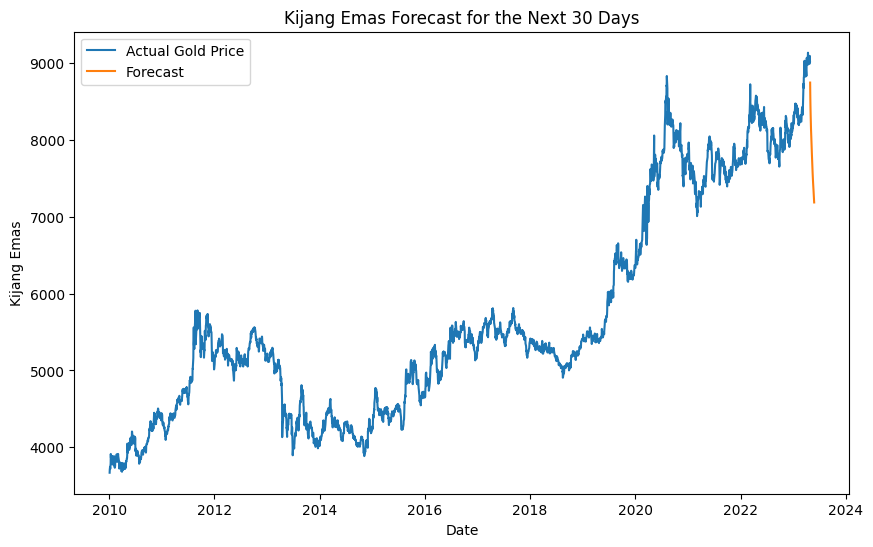

In [67]:
# Convert the NumPy array to a Pandas Series with a date range as index.
# Assuming 'data' DataFrame has a DatetimeIndex named 'Date'
y_pred_future_30_days = pd.Series(y_pred_future_30_days,
                                  index=pd.date_range(start=data.index[-1] + pd.Timedelta(days=1),
                                                      periods=len(y_pred_future_30_days),
                                                      freq='D'),
                                  name='Predicted Price')
# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['oz'], label='Actual Gold Price')
plt.plot(y_pred_future_30_days, label='Forecast') # Changed to directly use the Series
plt.title('Kijang Emas Forecast for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Kijang Emas')
plt.legend()
plt.show()

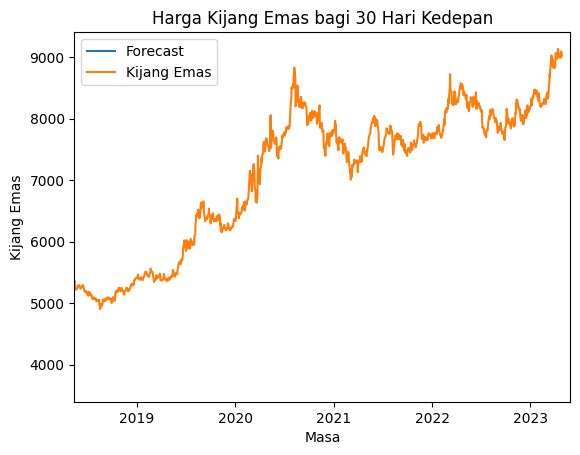

In [68]:
fig, ax = plt.subplots()
# Assuming 'data' is your DataFrame and forecast_df is your forecasted dataframe

# Align the x-axis for the forecasted data with forecast_df.index
ax.plot(future_predictions.index, future_predictions['Predicted Price'], label='Forecast')

# If you want to plot historical data, use a separate call with its corresponding dates:
ax.plot(data.index, data['oz'], label='Kijang Emas')  # Replace 'Data' with your column name ('oz')


ax.set_xlim(pd.Timestamp('2018-05-13'), pd.Timestamp('2023-05-30')) # Correct the date range
plt.legend(loc = 'upper left') # Add a legend to differentiate the lines
plt.title('Harga Kijang Emas bagi 30 Hari Kedepan')
plt.xlabel('Masa')
plt.ylabel('Kijang Emas')
plt.show()